# Evaluate --- Speaker Verification (SV)

In [1]:
# Auto-reload imported modules from sslsv
%load_ext autoreload
%autoreload 2

# Load sslsv as a package from the parent folder
import os
import sys
os.chdir('../..')
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

# Embed fonts when saving figures as PDF
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [3]:
from notebooks.notebooks_utils import (
    load_models,
    evaluate_models,
    create_metrics_df
)

from sv_visualization import (
    det_curve,
    scores_distribution,
    tsne_3D,
    tsne_2D,
    pca_2D
)

from sslsv.evaluations.CosineSVEvaluation import CosineSVEvaluation, CosineSVEvaluationTaskConfig

In [4]:
models = load_models(
    [
        './exps/old/vox2_ddp_sntxent_s=30_m=0/config.yml',
        './exps/old/vox2_ddp_sntxent_s=30_m=0.1/config.yml'
    ],
    override_names={
        'exps/old/vox2_ddp_sntxent_s=30_m=0'   : 'simclr',
        'exps/old/vox2_ddp_sntxent_s=30_m=0.1' : 'simclr_am'
    }
)

In [5]:
evaluate_models(models, CosineSVEvaluation, CosineSVEvaluationTaskConfig())

Extracting test embeddings: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:21<00:00,  3.46it/s]


## Metrics

In [6]:
create_metrics_df(models)

voxceleb1_test_O/eer  voxceleb1_test_O/mindcf
Model                                                   
simclr_am                7.8473                   0.6168
simclr                   8.4056                   0.6235

## Detection Error Tradeoff (DET)

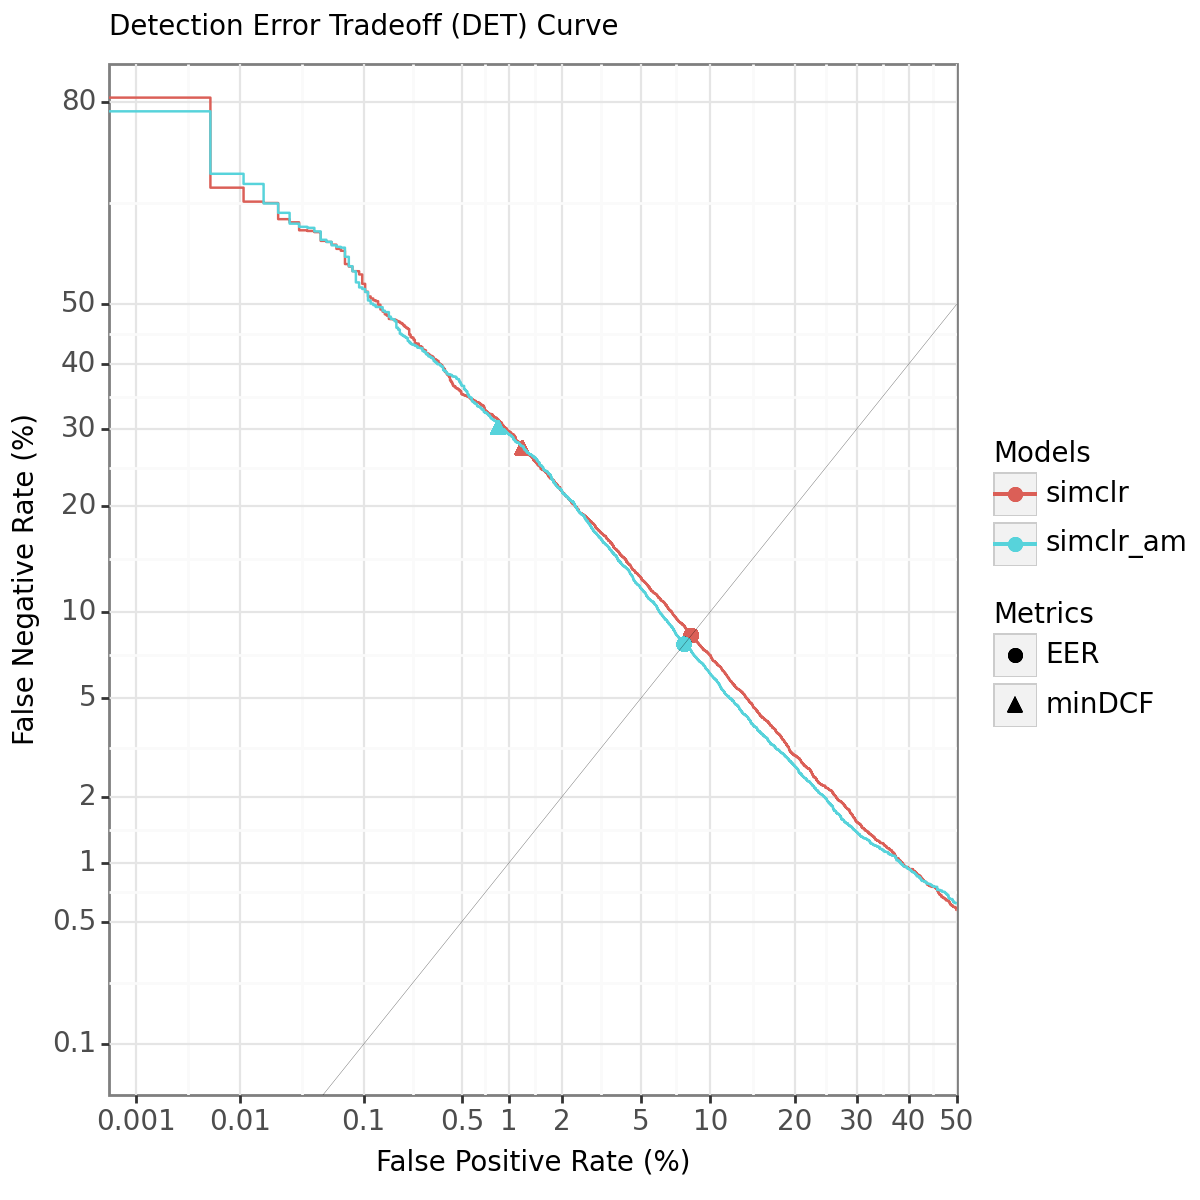

<Figure Size: (600 x 600)>

In [7]:
det_curve(models)

## Scores distribution

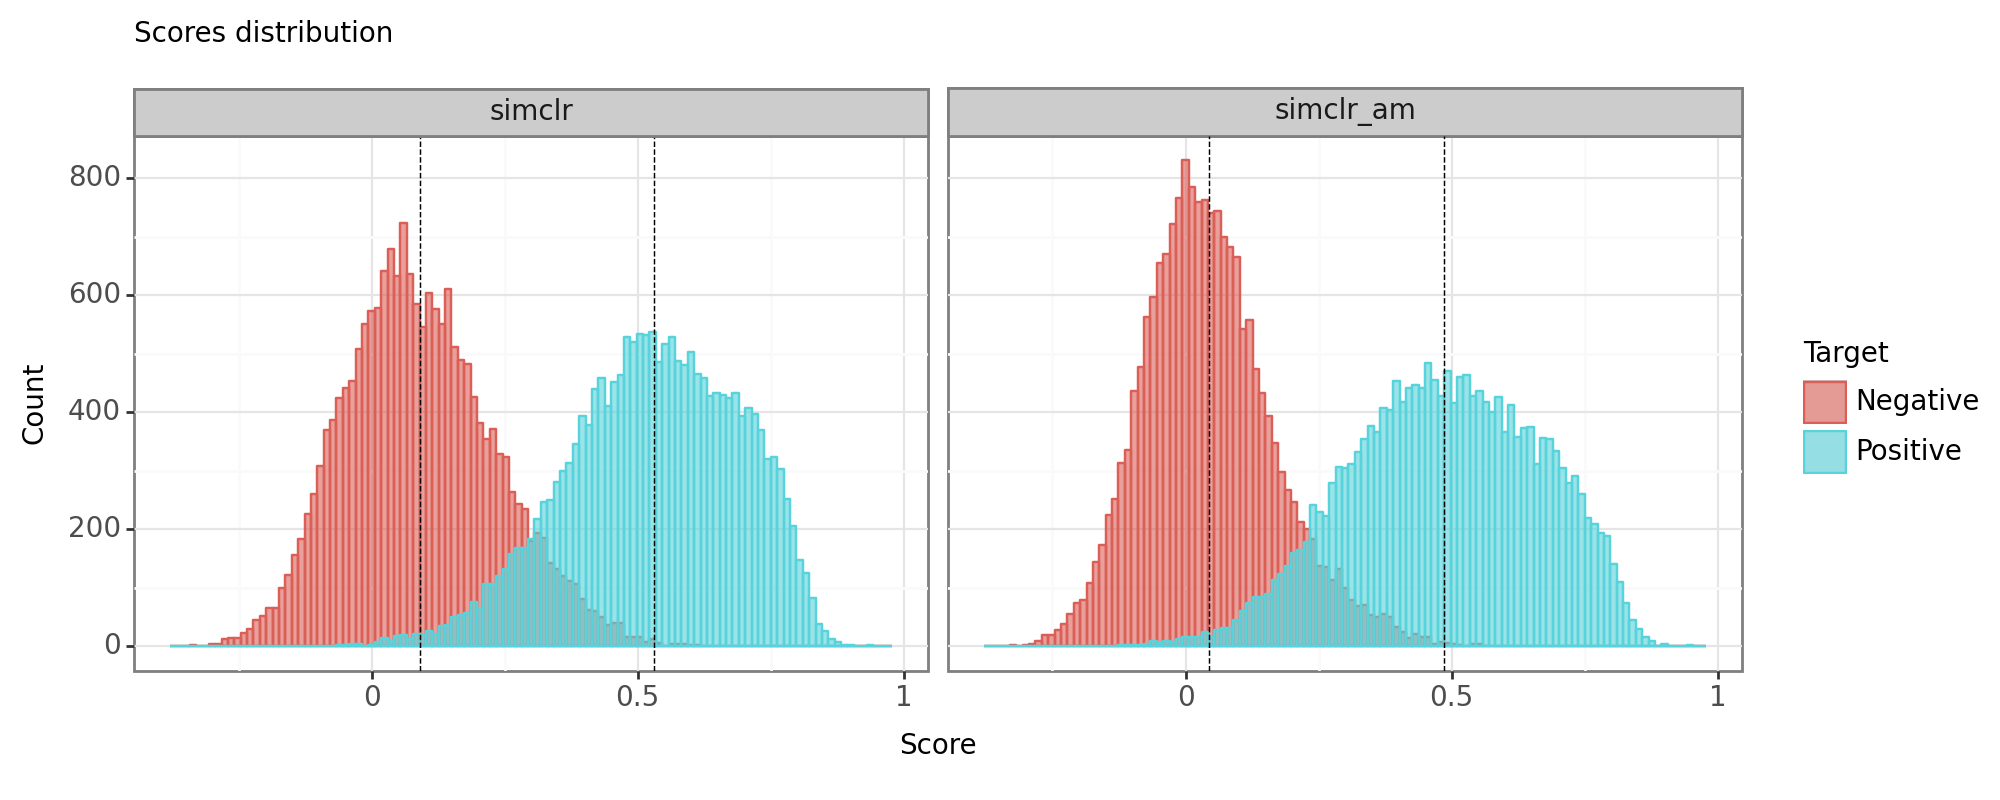

<Figure Size: (1000 x 400)>

In [8]:
scores_distribution(models, use_angle=False)#.save('score_distribution.pdf')

## t-SNE of speaker embeddings

In [10]:
tsne_3D(models['simclr'])

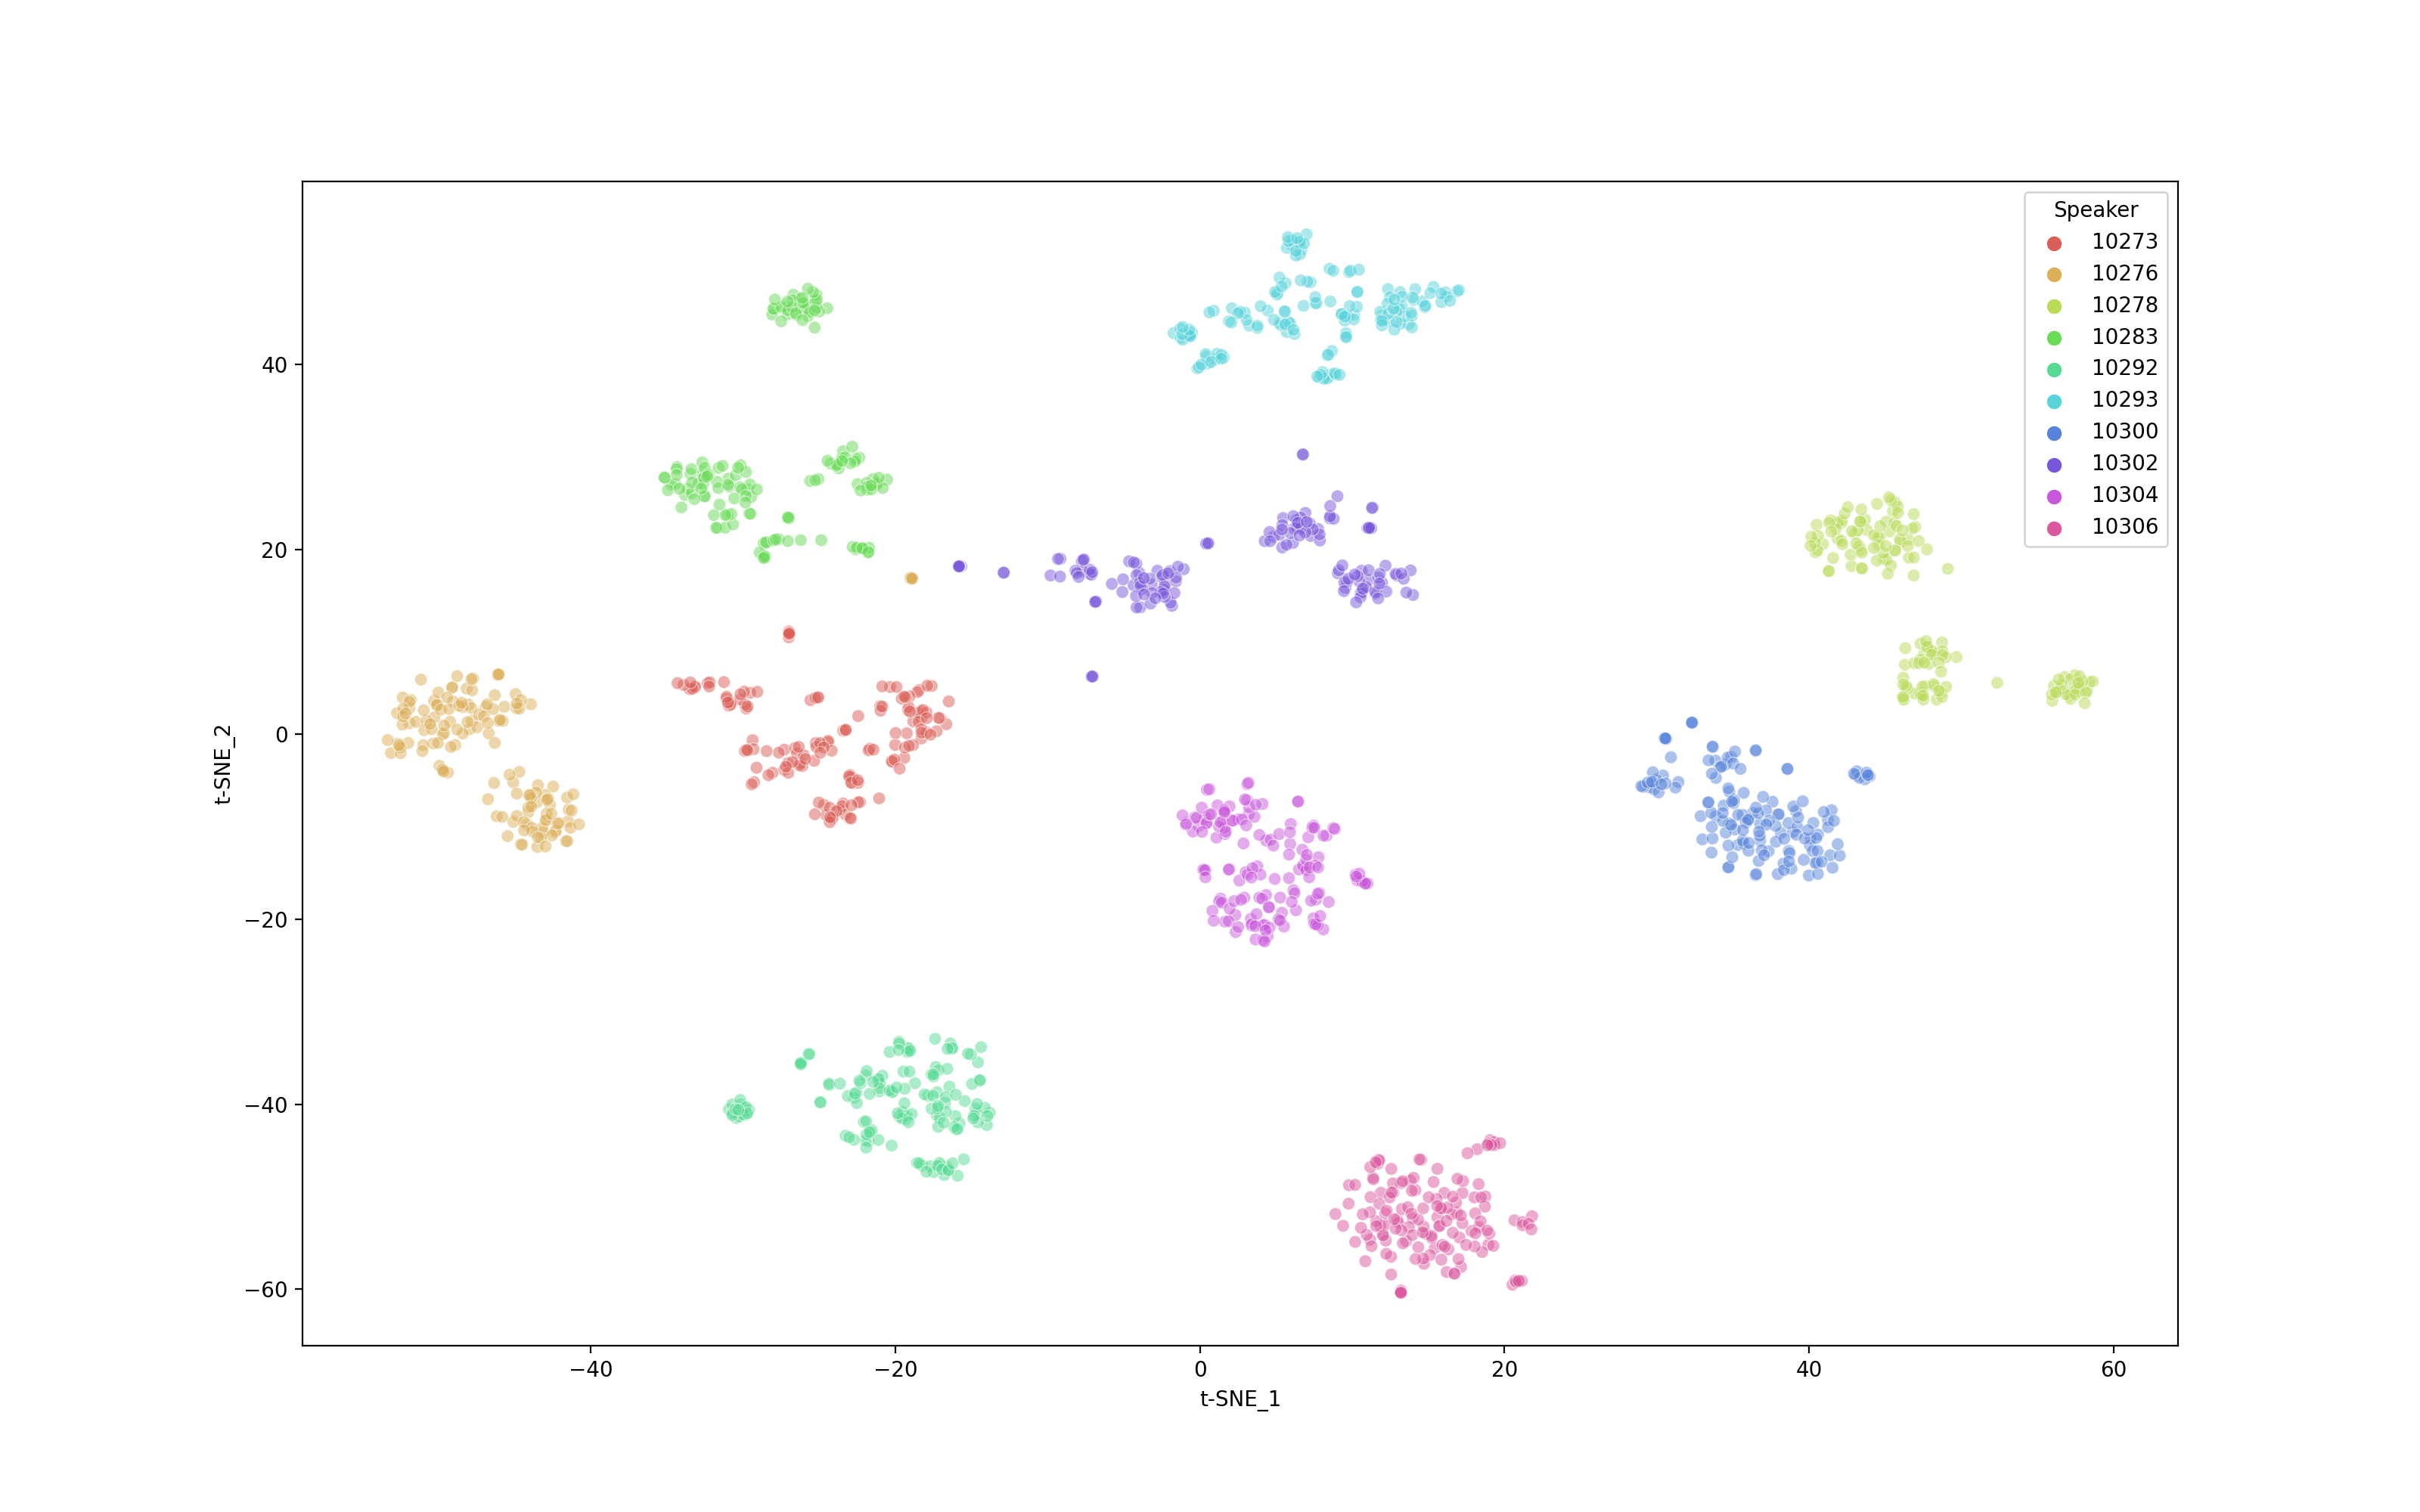

In [11]:
tsne_2D(models['simclr'])

## PCA of speaker embeddings

In [13]:
PCA_SPEAKERS = ['id10276', 'id10278', 'id10292', 'id10293', 'id10307', 'id10309']

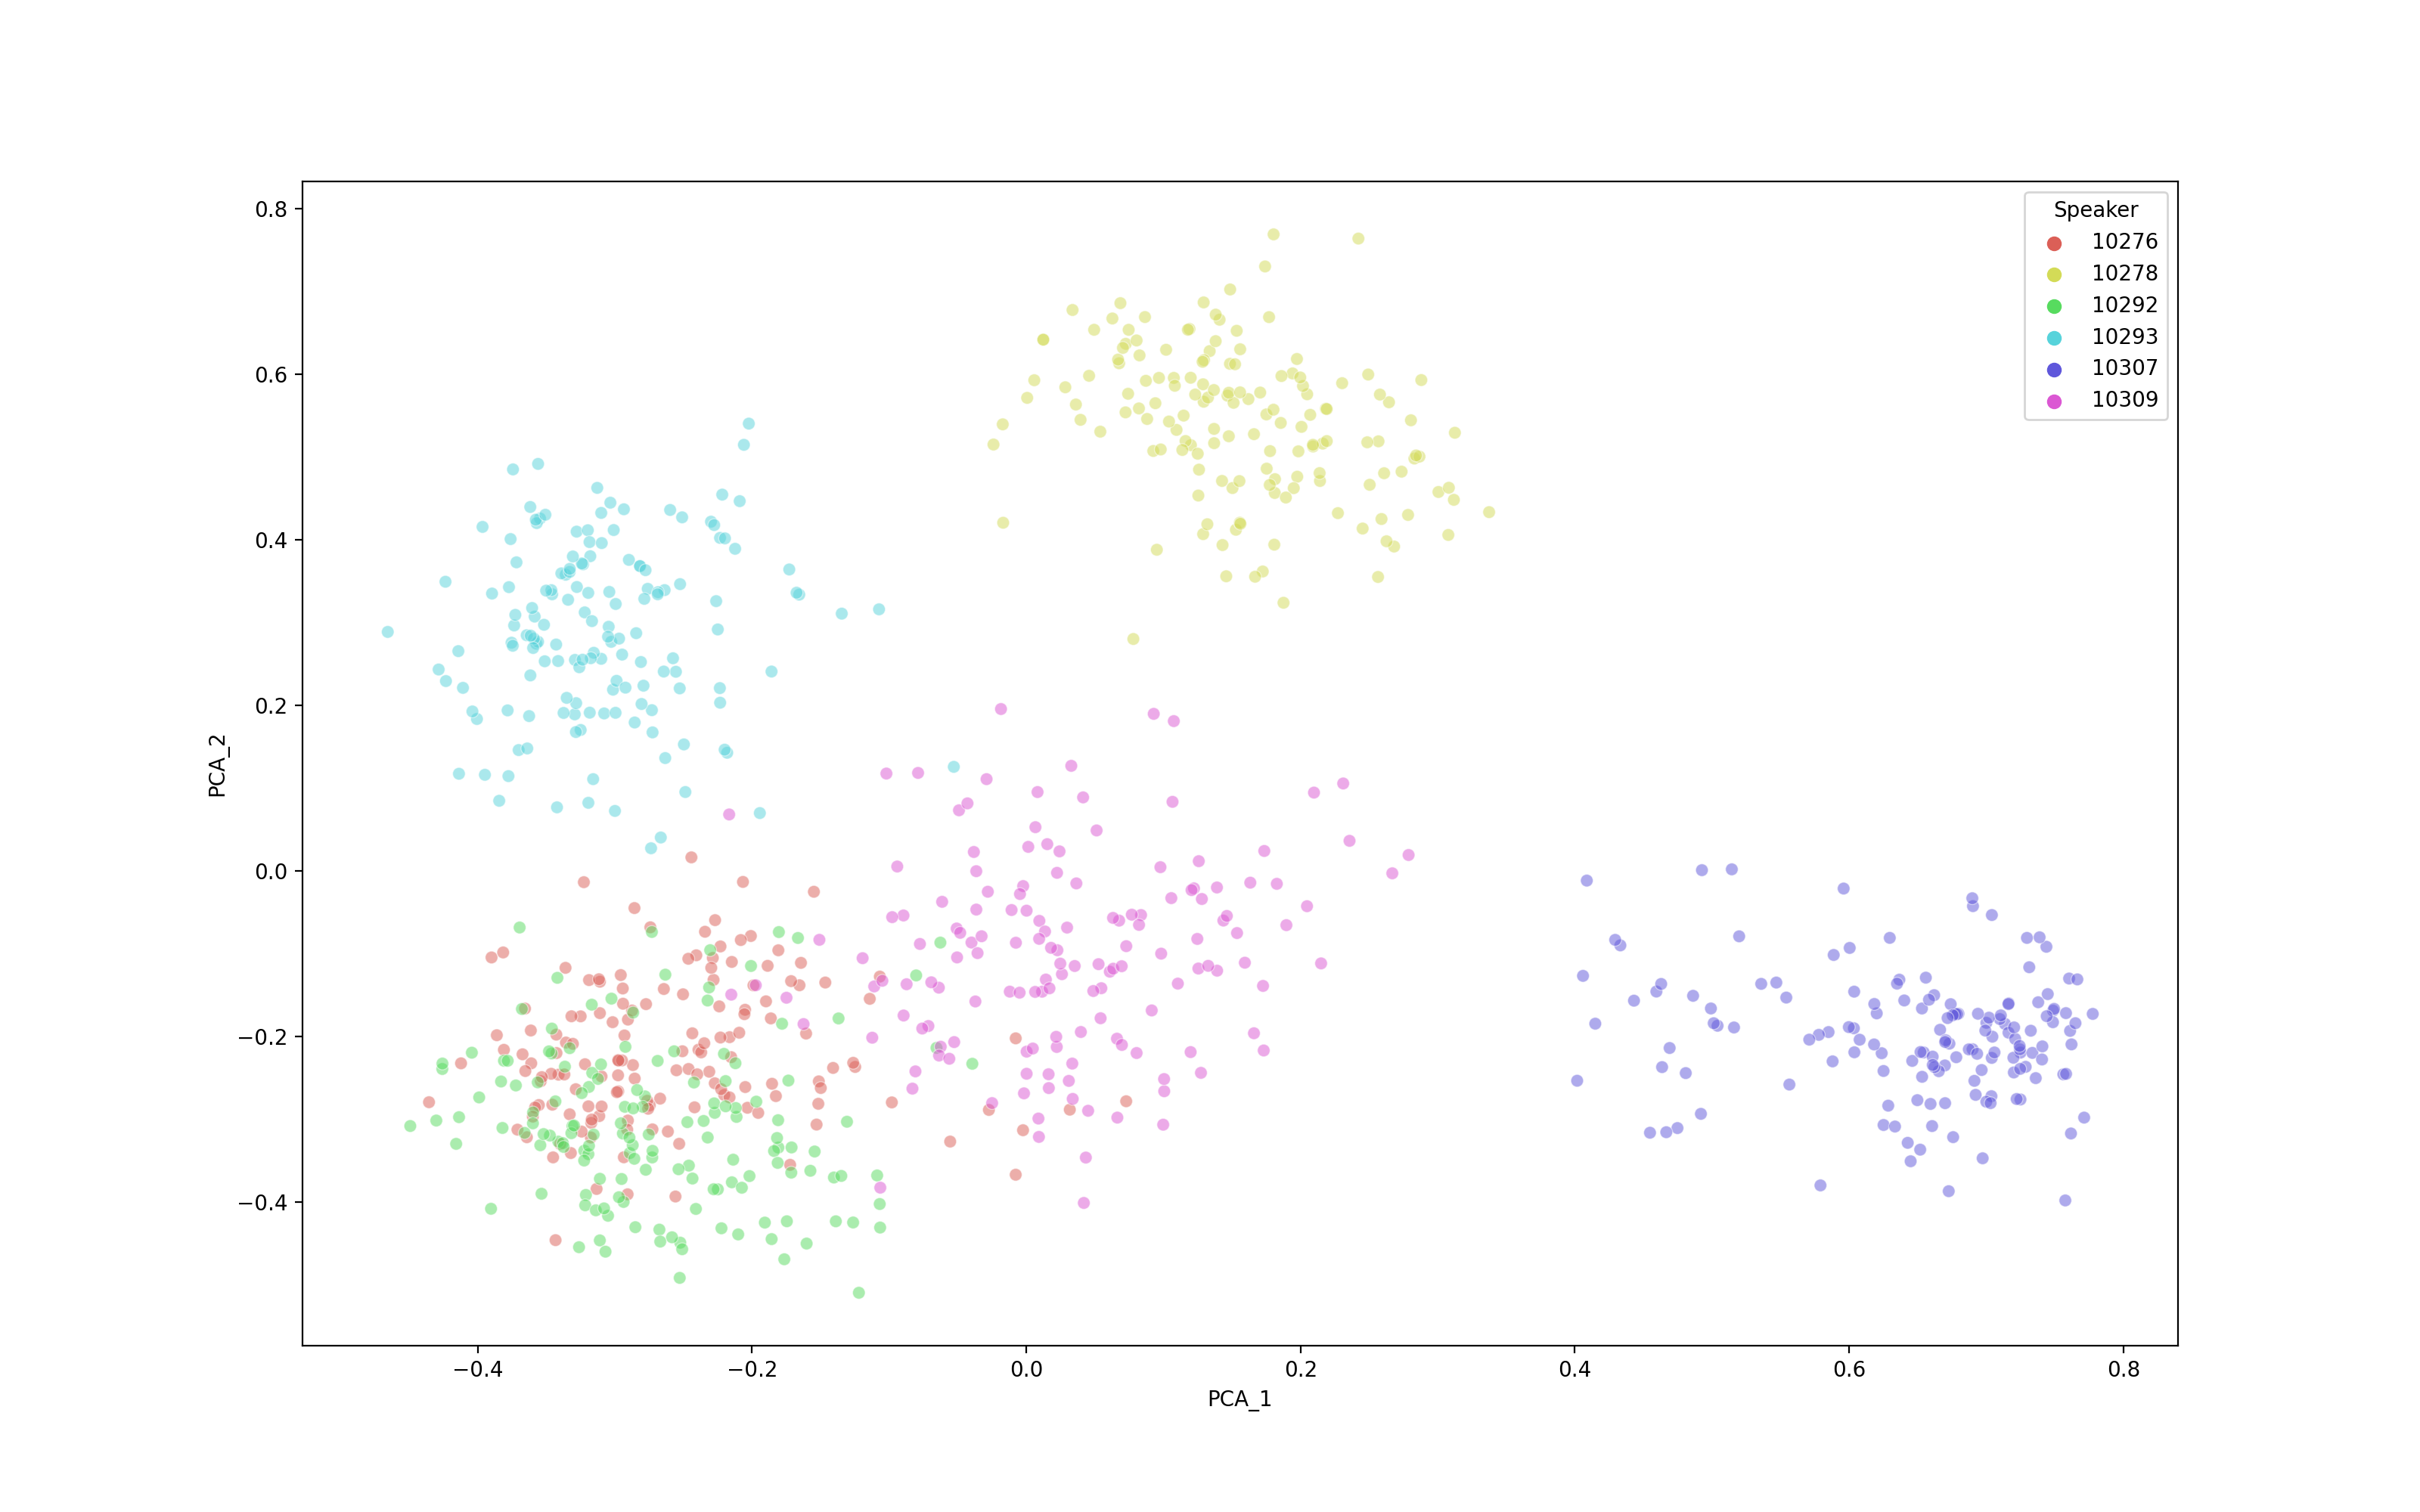

In [14]:
pca_2D(models['simclr'], speakers=PCA_SPEAKERS)

### Visualize different principal components

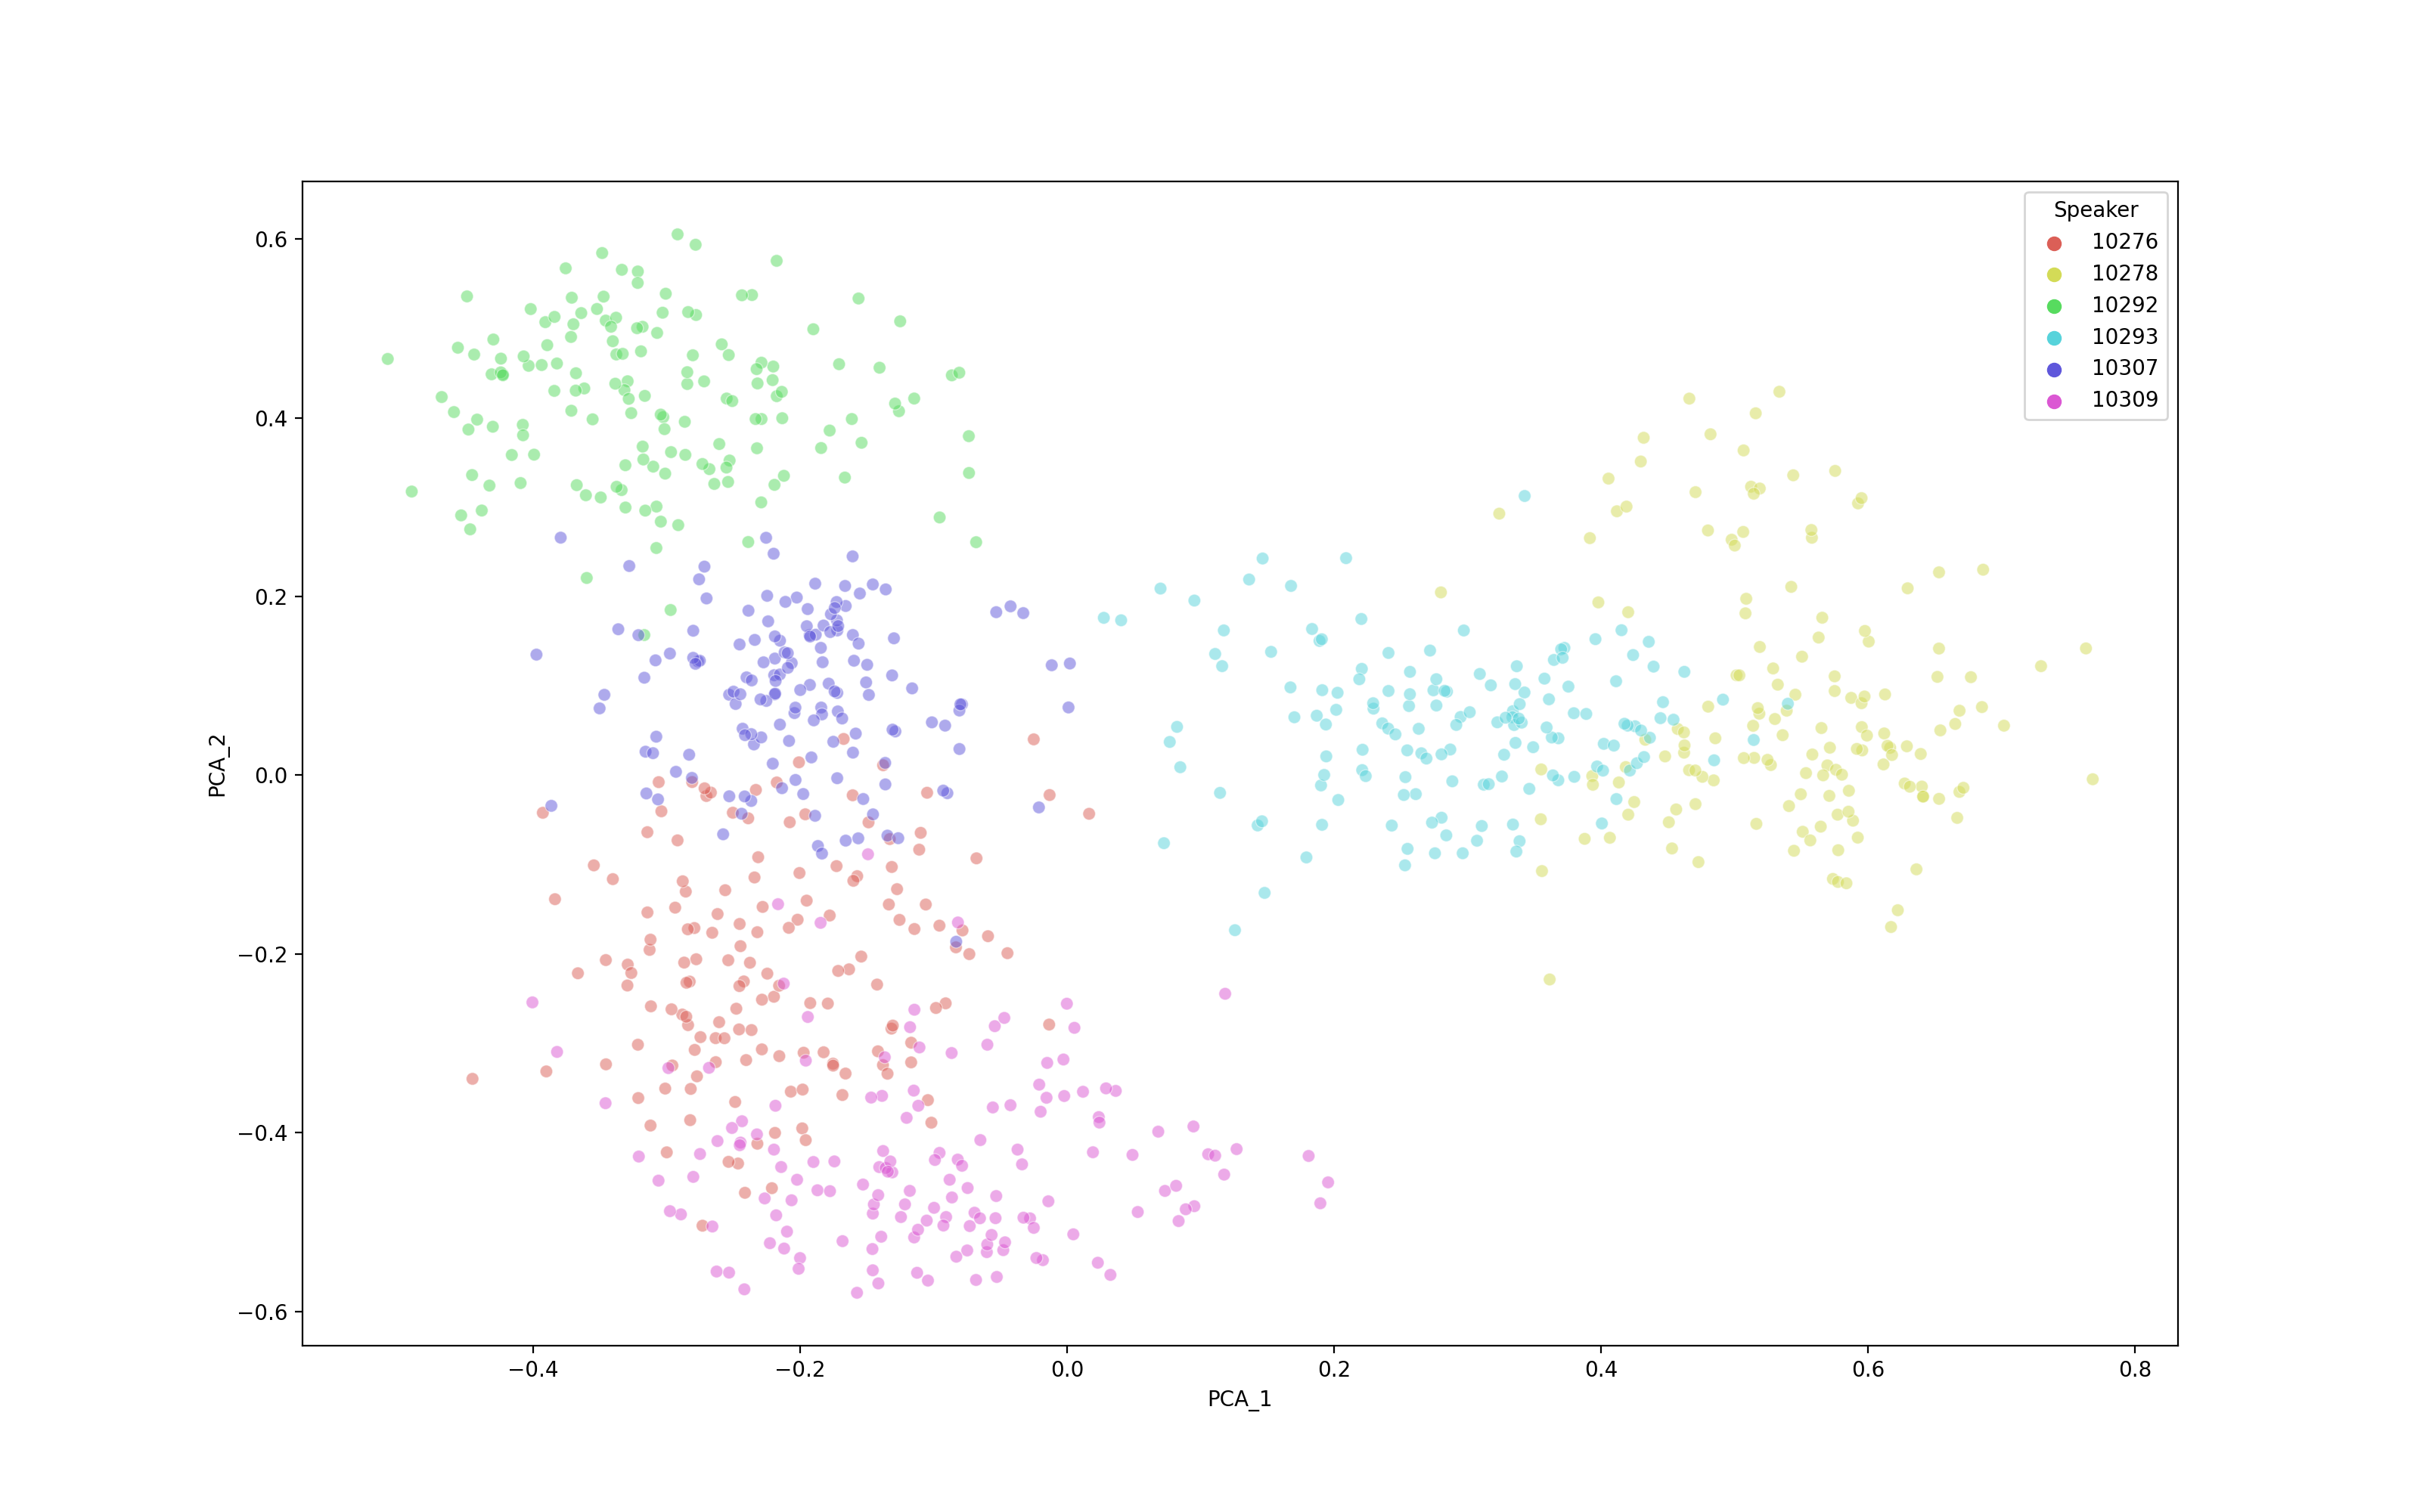

In [15]:
pca_2D(models['simclr'], components=[1, 2], speakers=PCA_SPEAKERS)

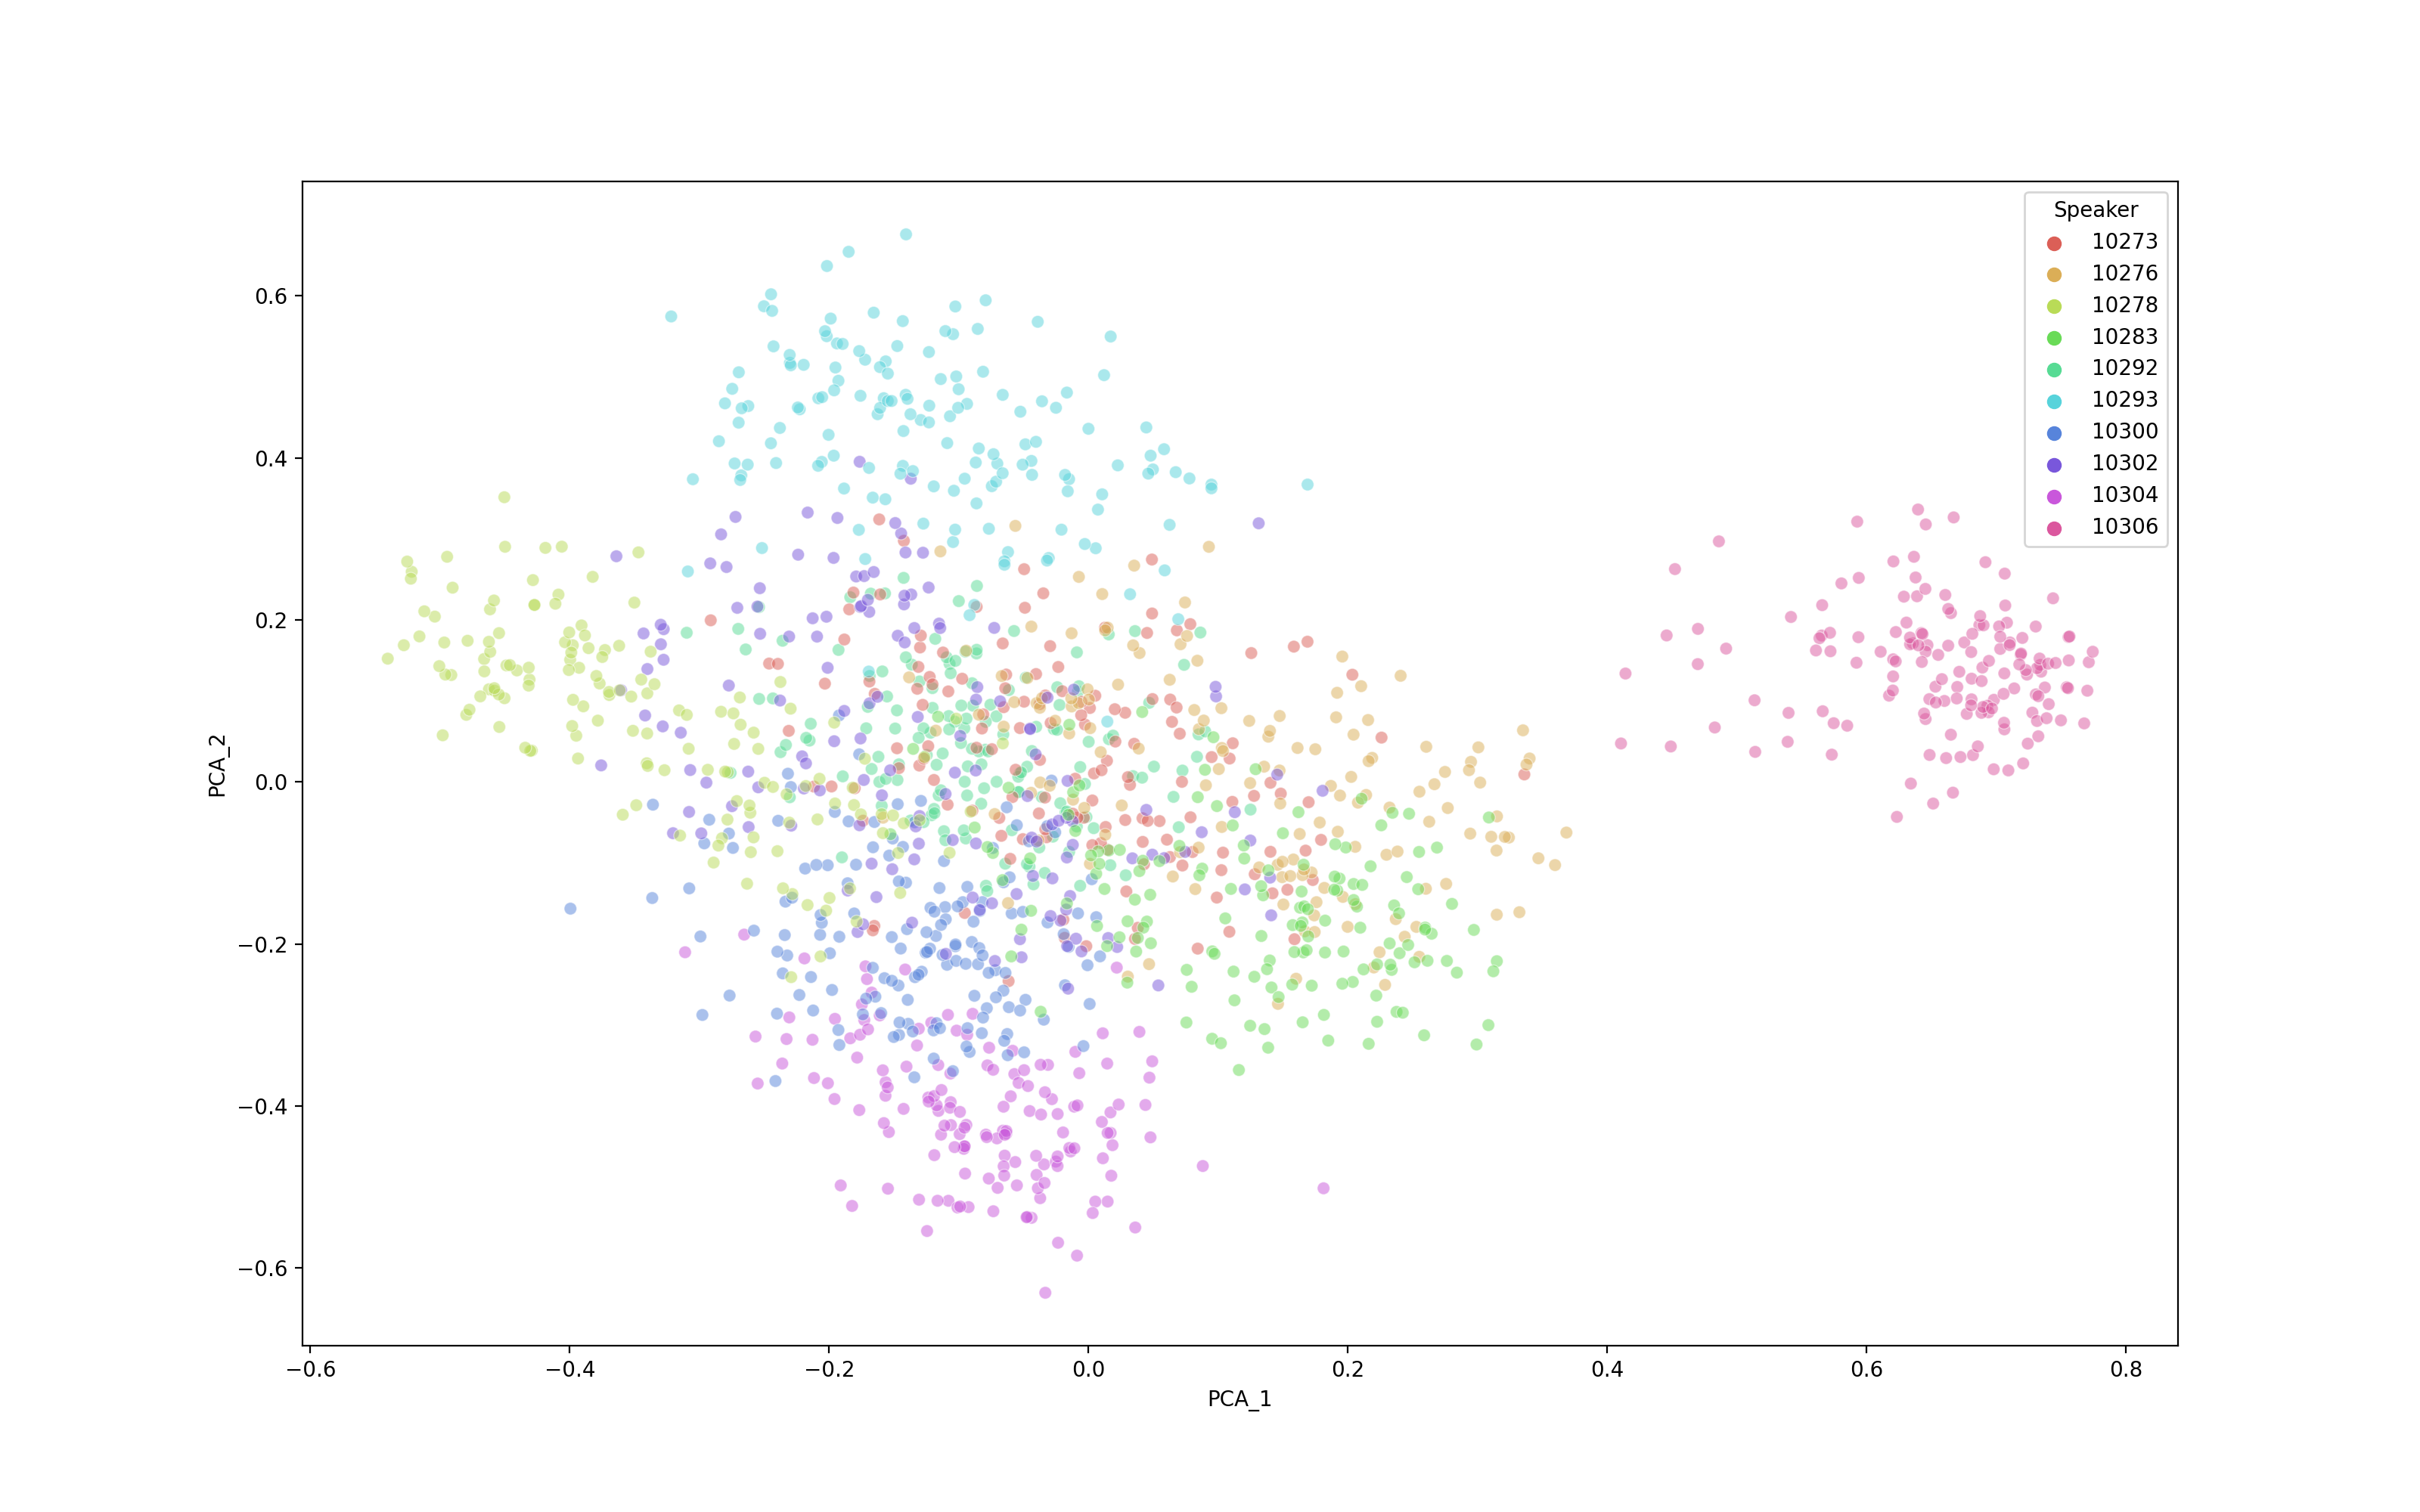

In [17]:
pca_2D(models['simclr'], components=[1, 2], nb_speakers=10, nb_samples=150)

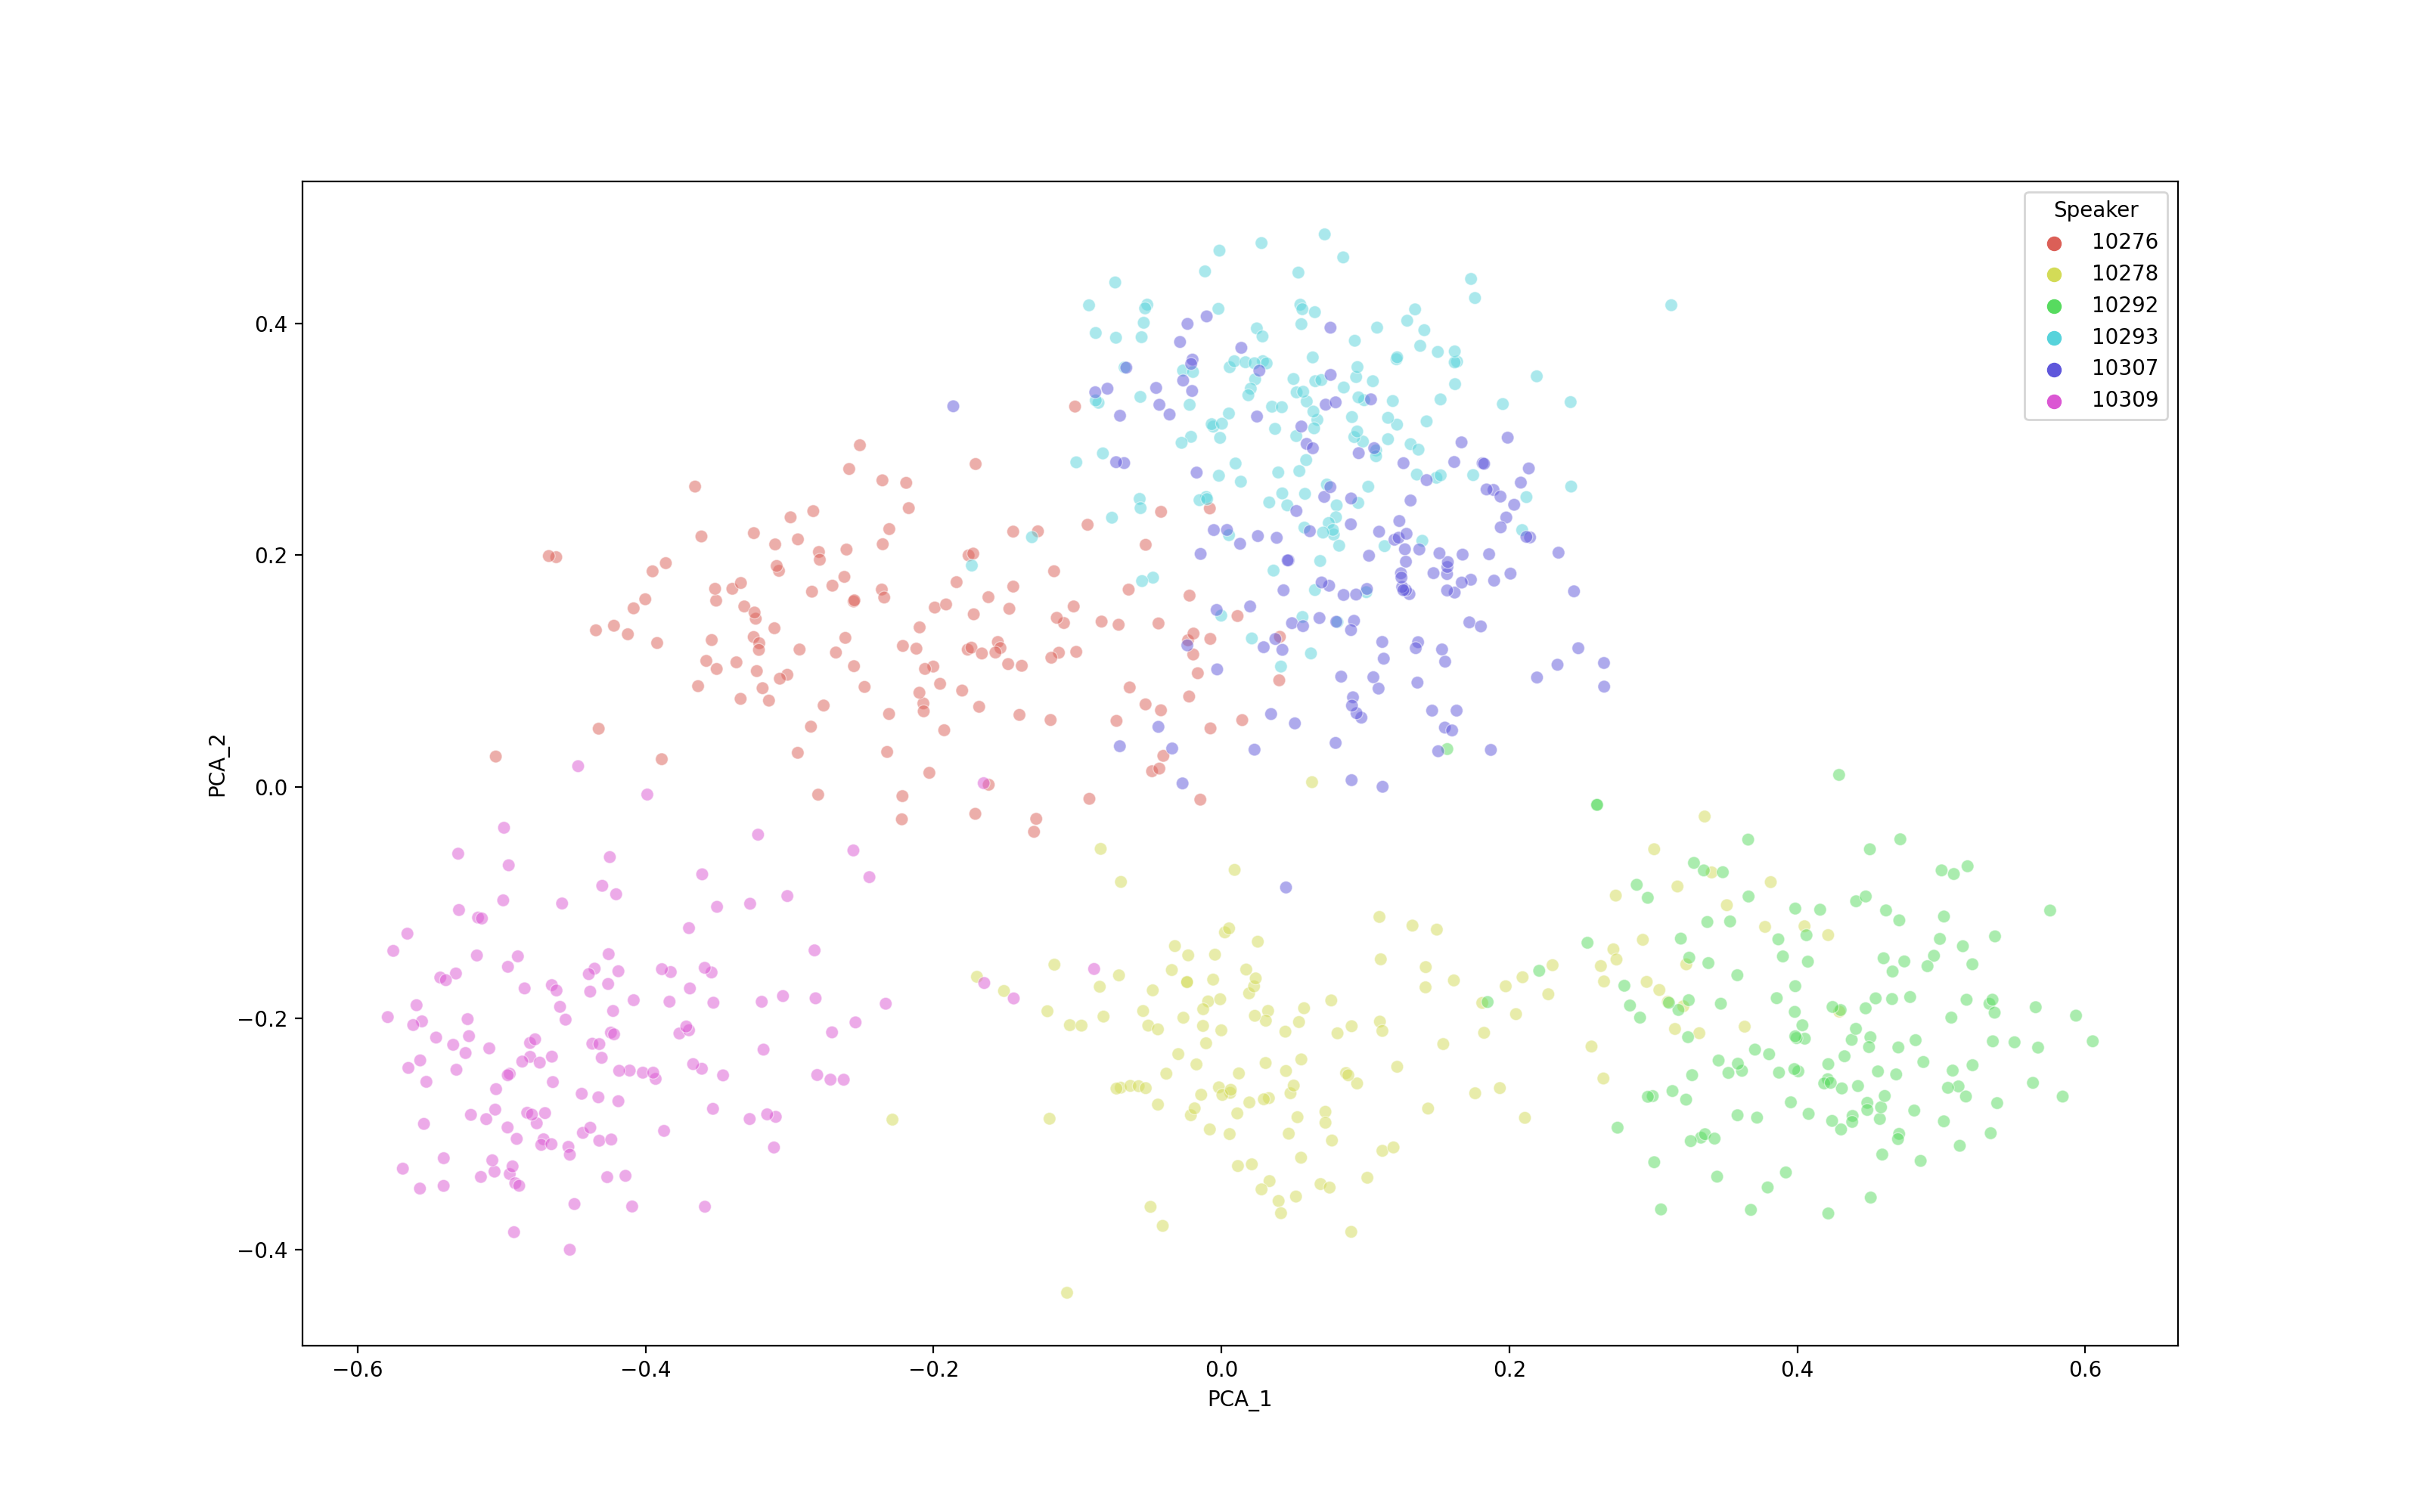

In [21]:
pca_2D(models['simclr'], components=[2, 3], speakers=PCA_SPEAKERS)